In [ ]:
##Installing Required Functions:
conda install -c conda-forge word cloud 

In [ ]:
pip install wordcloud

In [ ]:
conda install -c plotly plotly=5.4.0 

In [16]:
pip install yellowbrick

  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
#importing required Functions:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

import wordcloud
from wordcloud import WordCloud,STOPWORDS
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.utils import shuffle
import matplotlib.ticker as mtick

# Plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots




In [2]:
## Importing Data ::
data = pd.read_csv('C:/Users/Lenovo/Downloads/archive/IPIP-FFM-data-8Nov2018/data-final.csv', delimiter='\t')
data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,2018-11-08 12:07:49,1920.0,1080.0,2.0,135.0,12,6,US,36.1473,-86.777
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2018-11-08 12:08:34,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067


In [3]:
#Keeping a copy of the data and removing unneccesary columns for classifying:
data1 = data.copy()

data.drop(data.columns[50:106], axis=1, inplace=True)
data.drop(data.columns[52:], axis=1, inplace=True)
data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,IPC,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,1,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,1,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,1,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,1,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,2,KE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0,2,US
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0,1,US
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0,6,US
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0,1,US


In [4]:
#data.country.fillna(value=np.nan, inplace=True)
data['country'] = data['country'].str.replace('NONE','IR')

In [5]:
#Finding out number of more IPs in the data(i.e having more than one entries):
result = data[(data['IPC'] > 1)]
print("Multiple attempts:")
print(result['IPC'])
result1 = data[(data['IPC'] == 1)]
print("Single attempt:")
print(result1['IPC'])

Multiple attempts:
4           2
17          6
26          3
32          2
39          3
           ..
1015328     2
1015330    21
1015333    15
1015336     2
1015338     6
Name: IPC, Length: 318496, dtype: int64
Single attempt:
0          1
1          1
2          1
3          1
5          1
          ..
1015334    1
1015335    1
1015337    1
1015339    1
1015340    1
Name: IPC, Length: 696845, dtype: int64


In [6]:
#Check Missing Value
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
print("Total number of participants: ",len(data))
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  True
How many missing values?  89227
Total number of participants:  1015341
Number of participants after eliminating missing values:  1013481


In [7]:
#barplots showing the frequency of each category
# Associate text to answer
labels = ['I am the life of the party.', 'I don\'t talk a lot.', 'I feel comfortable around people.', 'I keep in the background.', 
          'I start conversations.', 'I have little to say.', 'I talk to a lot of different people at parties.', 
          'I don\'t like to draw attention to myself.', 'I don\'t mind being the center of attention.', 'I am quiet around strangers.', 
          'I get stressed out easily.', 'I am relaxed most of the time.', 'I worry about things.', 'I seldom feel blue.', 
          'I am easily disturbed.', 'I get upset easily.', 'I change my mood a lot.', 'I have frequent mood swings.', 'I get irritated easily.', 
          'I often feel blue.', 'I feel little concern for others.', 'I am interested in people.', 'I insult people.', 
          'I sympathize with others\' feelings.', 'I am not interested in other people\'s problems.', 'I have a soft heart.', 
          'I am not really interested in others.', 'I take time out for others.', 'I feel others\' emotions.', 'I make people feel at ease.', 
          'I am always prepared.', 'I leave my belongings around.', 'I pay attention to details.', 'I make a mess of things.', 
          'I get chores done right away.', 'I often forget to put things back in their proper place.', 'I like order.', 'I shirk my duties.', 
          'I follow a schedule.', 'I am exacting in my work.', 'I have a rich vocabulary.', 'I have difficulty understanding abstract ideas.',
          'I have a vivid imagination.', 'I am not interested in abstract ideas.', 'I have excellent ideas.', 
          'I do not have a good imagination.', 'I am quick to understand things.', 'I use difficult words.', 
          'I spend time reflecting on things.', 'I am full of ideas.']

Graph for Extroversial PPersonality test questions:


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\li

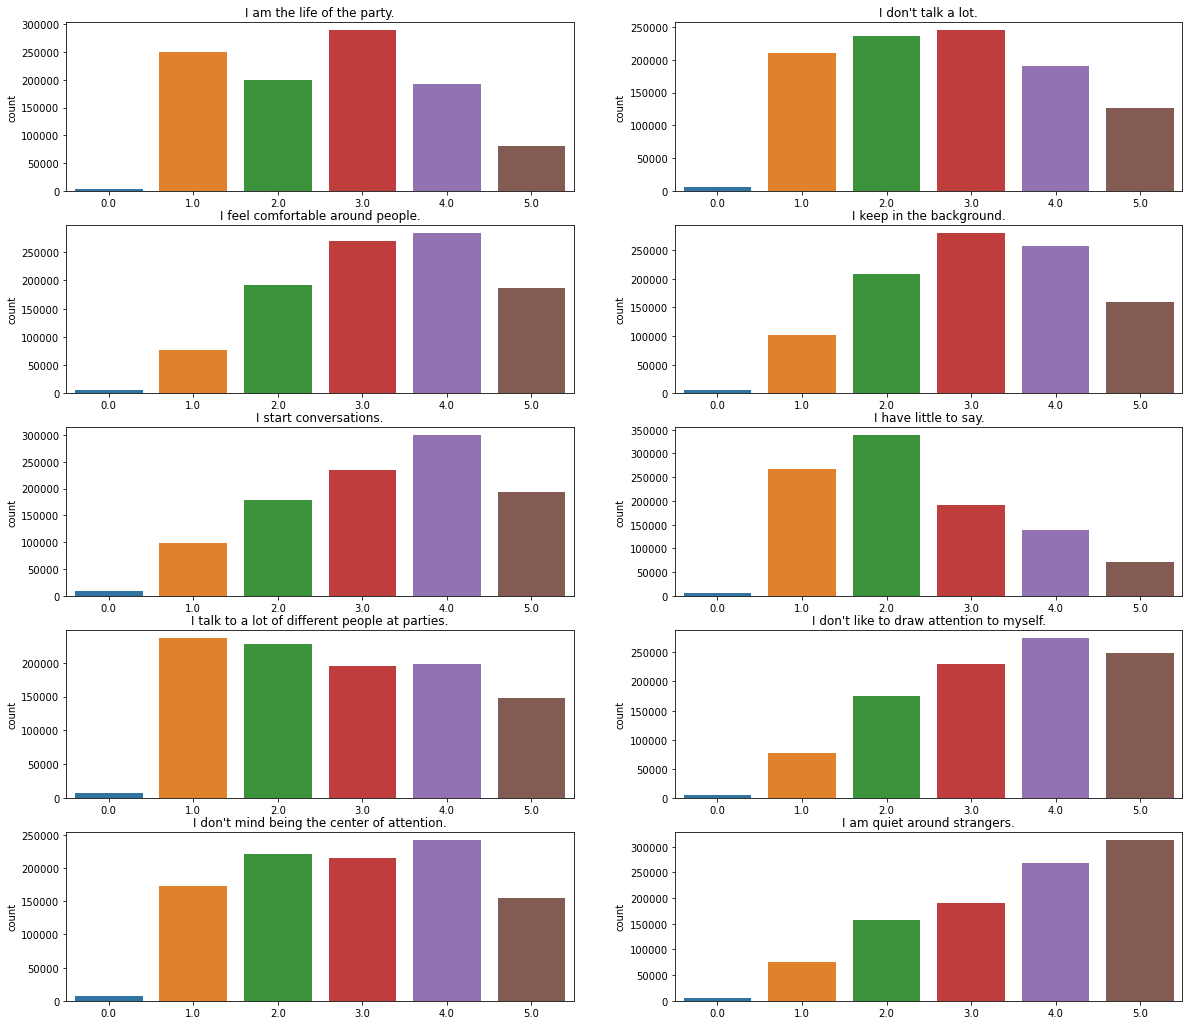

In [8]:

print("Graph for Extroversial PPersonality test questions:")
fig, axes = plt.subplots(5, 2,figsize=(20,18))

ax1 = sns.countplot(data[data.columns[0]], ax=axes[0,0])
ax1.set_xlabel('')
ax2 = sns.countplot(data[data.columns[1]],ax=axes[0,1])
ax2.set_xlabel('')
ax3 = sns.countplot(data[data.columns[2]], ax=axes[1,0])
ax3.set_xlabel('')
ax4 = sns.countplot(data[data.columns[3]],ax=axes[1,1])
ax4.set_xlabel('')
ax5 = sns.countplot(data[data.columns[4]], ax=axes[2,0])
ax5.set_xlabel('')
ax6 = sns.countplot(data[data.columns[5]],ax=axes[2,1])
ax6.set_xlabel('')
ax7 = sns.countplot(data[data.columns[6]], ax=axes[3,0])
ax7.set_xlabel('')
ax8 = sns.countplot(data[data.columns[7]],ax=axes[3,1])
ax8.set_xlabel('')
ax9 = sns.countplot(data[data.columns[8]], ax=axes[4,0])
ax9.set_xlabel('')
ax10 = sns.countplot(data[data.columns[9]],ax=axes[4,1])
ax10.set_xlabel('')

ax1.title.set_text(labels[0])
ax2.title.set_text(labels[1])
ax3.title.set_text(labels[2])
ax4.title.set_text(labels[3])
ax5.title.set_text(labels[4])
ax6.title.set_text(labels[5])
ax7.title.set_text(labels[6])
ax8.title.set_text(labels[7])
ax9.title.set_text(labels[8])
ax10.title.set_text(labels[9])

plt.show()

In [9]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

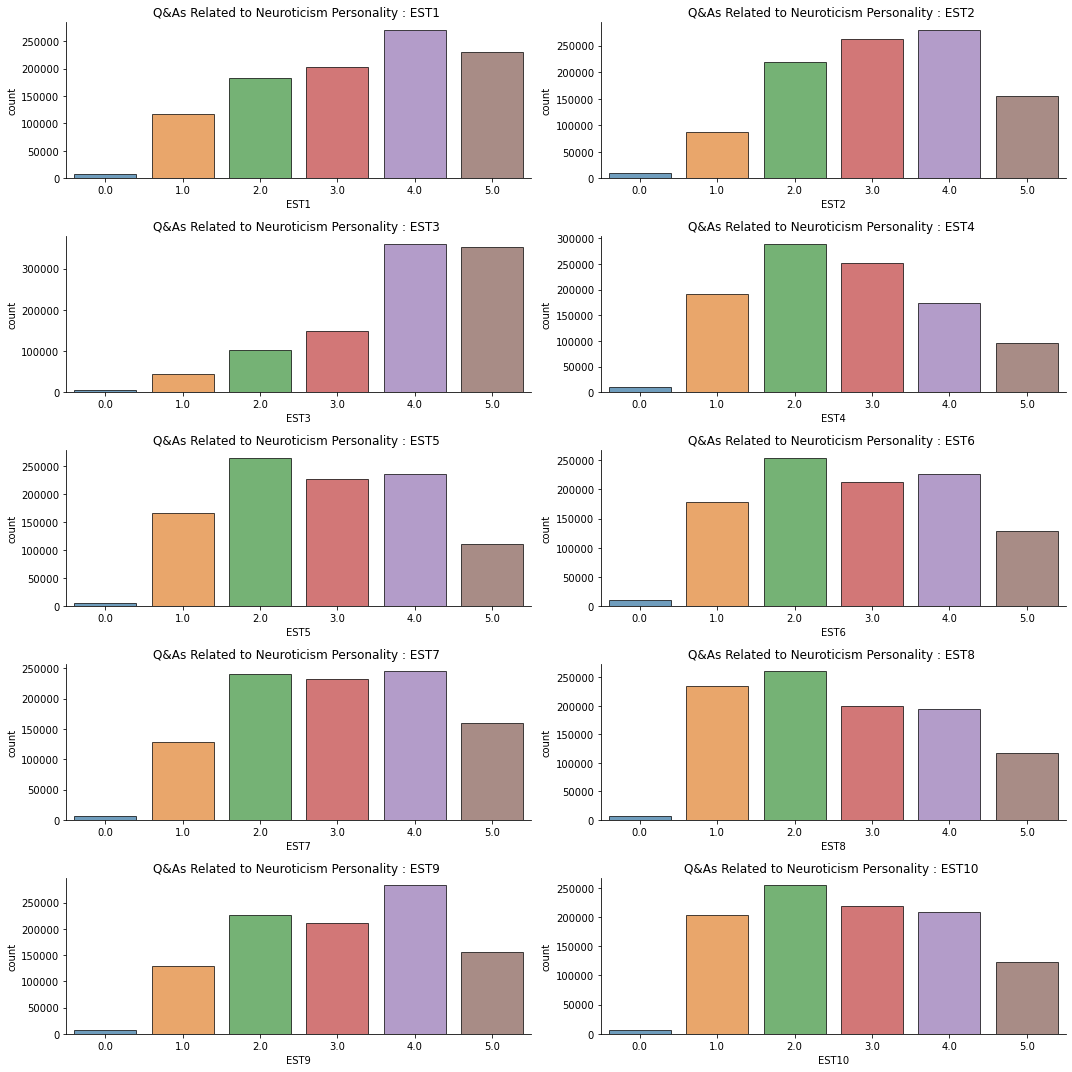

In [10]:
#barplots showing the frequency of each category 
plt.figure(figsize=[15,15])
fft=['EST1','EST2','EST3','EST4','EST5','EST6','EST7','EST8','EST9','EST10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f,  edgecolor="black", alpha=0.7, data=data)
    sns.despine()
    plt.title("Q&As Related to Neuroticism Personality : {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

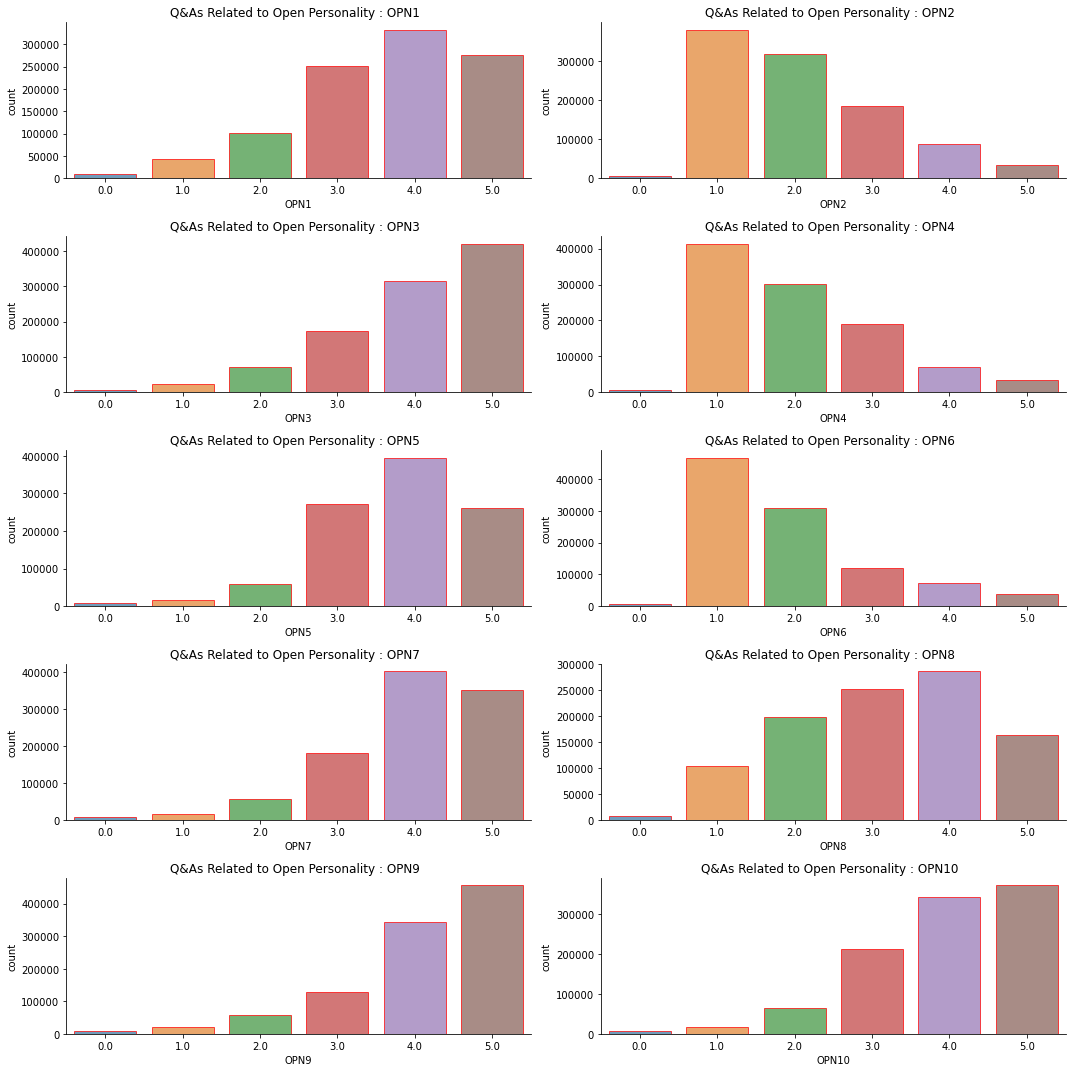

In [11]:
#barplots showing the frequency of each category 
plt.figure(figsize=[15,15])
fft=['OPN1','OPN2','OPN3','OPN4','OPN5','OPN6','OPN7','OPN8','OPN9','OPN10']
n=1

for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f,  edgecolor="red", alpha=0.7, data=data)
    sns.despine()
    plt.title("Q&As Related to Open Personality : {}  ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

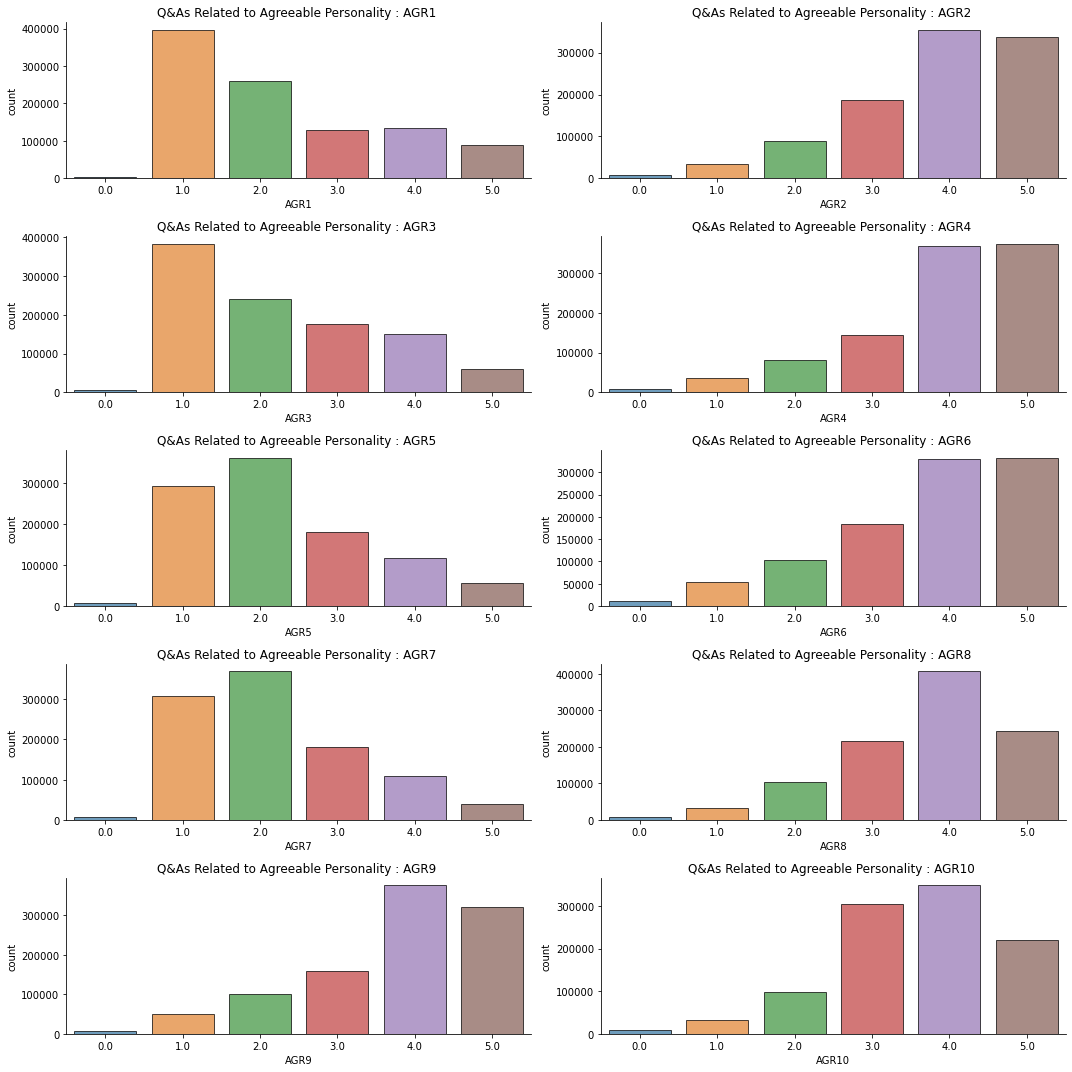

In [12]:
#barplots showing the frequency of each category 
plt.figure(figsize=[15,15])
fft=['AGR1','AGR2','AGR3','AGR4','AGR5','AGR6','AGR7','AGR8','AGR9','AGR10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f, edgecolor="black", alpha=0.7, data=data)
    sns.despine()
    plt.title("Q&As Related to Agreeable Personality : {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()


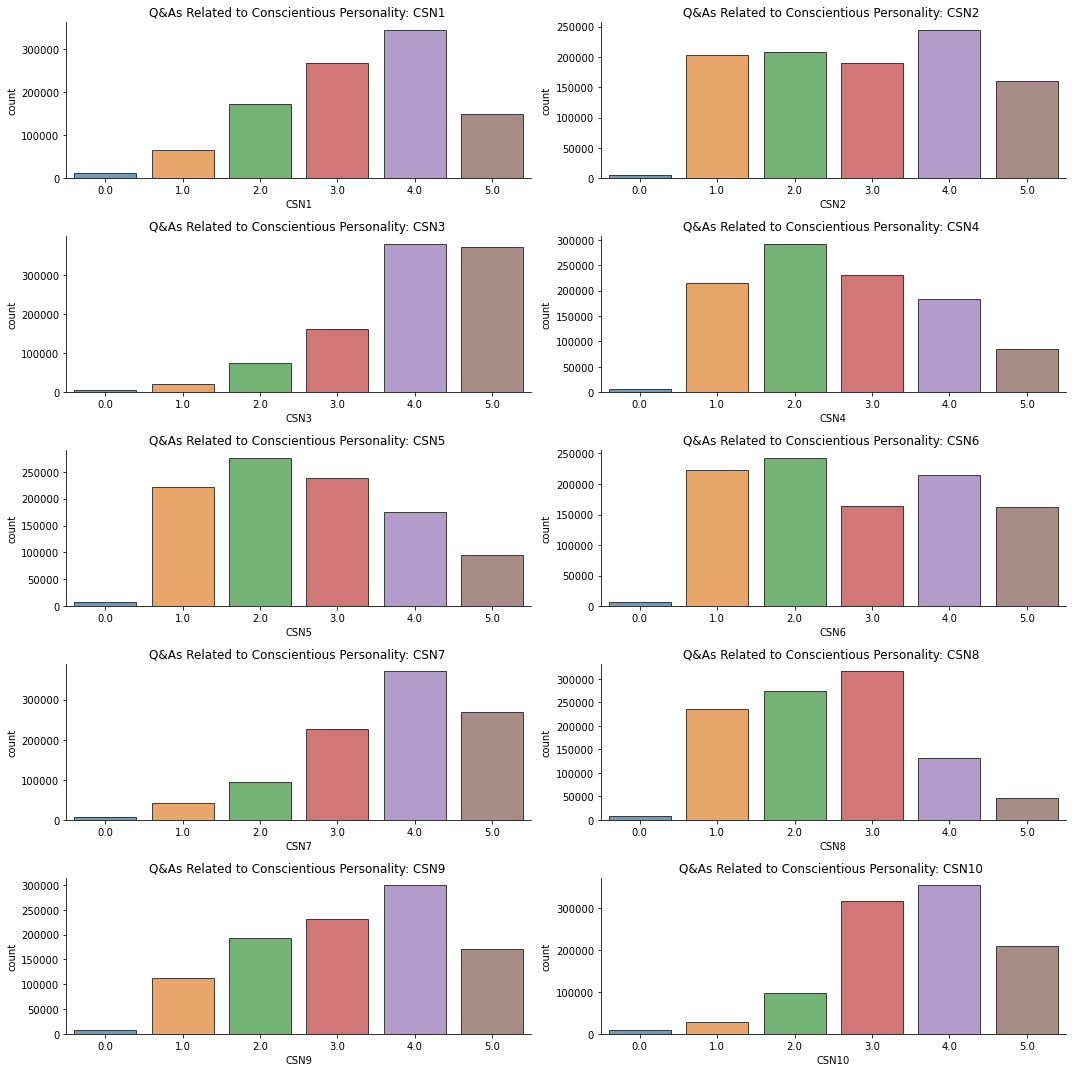

In [13]:
#barplots showing the frequency of each category 
plt.figure(figsize=[15,15])
fft=['CSN1','CSN2','CSN3','CSN4','CSN5','CSN6','CSN7','CSN8','CSN9','CSN10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f, edgecolor="black", alpha=0.7, data=data)
    sns.despine()
    plt.title("Q&As Related to Conscientious Personality: {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()



In [14]:
#Importing K-means Functions:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [64]:
data = pd.read_csv('C:/Users/Lenovo/Downloads/archive/IPIP-FFM-data-8Nov2018/data-final.csv', delimiter='\t')
data.dropna(inplace=True)

In [65]:
df = data.iloc[:,:50]

In [66]:
#Creating Clusters with K-means in range(1,10) for plotting error graph:
ssd = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    ssd.append(km.inertia_)

In [17]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)
df= data.drop('IPC',axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]



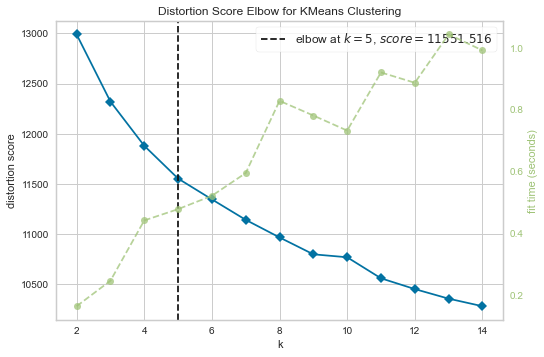

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
# Visualize the elbow
from sklearn.cluster import KMeans
import yellowbrick.cluster
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

In [26]:
# Create and fit model
kmeans = KMeans(n_clusters=5)
model = kmeans.fit(df)
model

KMeans(n_clusters=5)

In [27]:
#Adding cluster predictions for the data:
pred = model.labels_
df['Cluster'] = pred

In [28]:
# Create PCA for data visualization / Dimensionality reduction to 2D graph
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_model = pca.fit_transform(df)
df_transform = pd.DataFrame(data = pca_model, columns = ['PCA1', 'PCA2'])
df_transform['Cluster'] = pred



0:Extroversial
1:Neuroticism
2:Agreeableness
3:Conscientiousness
4:Openess


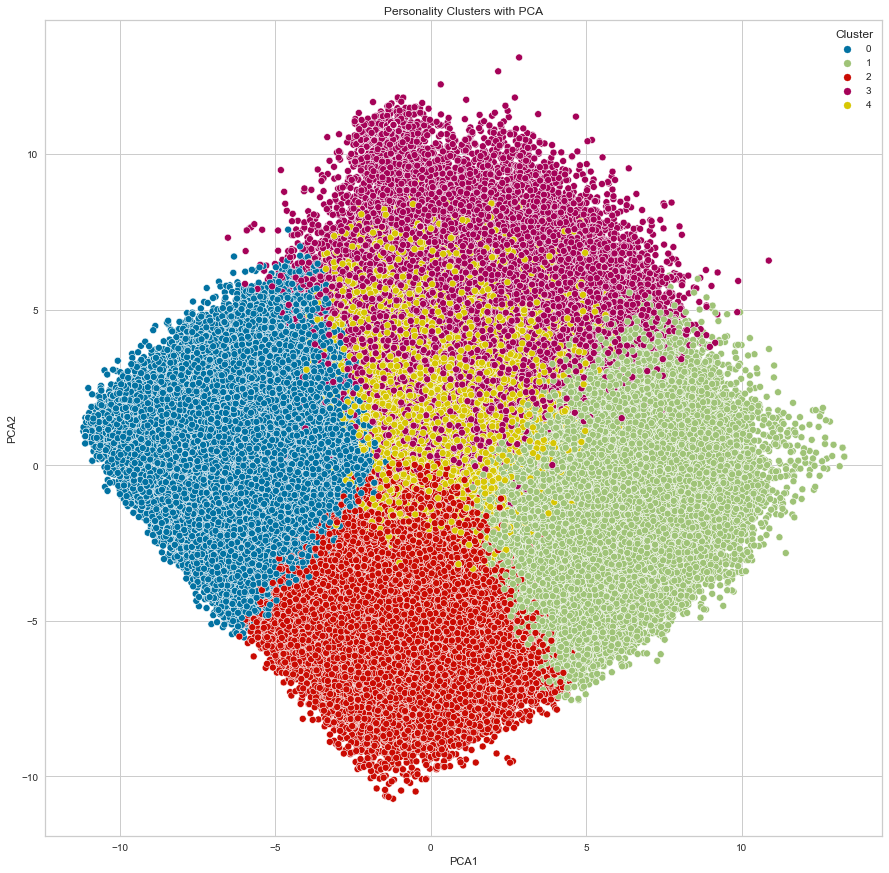

In [30]:
#Plotting out the points of each candidate in 2D according to his/her traits having same qualities:
plt.figure(figsize=(15,15))
g = sns.scatterplot(data=df_transform, x='PCA1', y='PCA2', palette=sns.color_palette()[:5], hue='Cluster')
title = plt.title('Personality Clusters with PCA')
print("0:Extroversial")
print("1:Neuroticism")
print("2:Agreeableness")
print("3:Conscientiousness")
print("4:Openess")

In [31]:
# Associate text to answer
labels = ['I am the life of the party.', 'I don\'t talk a lot.', 'I feel comfortable around people.', 'I keep in the background.', 
          'I start conversations.', 'I have little to say.', 'I talk to a lot of different people at parties.', 
          'I don\'t like to draw attention to myself.', 'I don\'t mind being the center of attention.', 'I am quiet around strangers.', 
          'I get stressed out easily.', 'I am relaxed most of the time.', 'I worry about things.', 'I seldom feel blue.', 
          'I am easily disturbed.', 'I get upset easily.', 'I change my mood a lot.', 'I have frequent mood swings.', 'I get irritated easily.', 
          'I often feel blue.', 'I feel little concern for others.', 'I am interested in people.', 'I insult people.', 
          'I sympathize with others\' feelings.', 'I am not interested in other people\'s problems.', 'I have a soft heart.', 
          'I am not really interested in others.', 'I take time out for others.', 'I feel others\' emotions.', 'I make people feel at ease.', 
          'I am always prepared.', 'I leave my belongings around.', 'I pay attention to details.', 'I make a mess of things.', 
          'I get chores done right away.', 'I often forget to put things back in their proper place.', 'I like order.', 'I shirk my duties.', 
          'I follow a schedule.', 'I am exacting in my work.', 'I have a rich vocabulary.', 'I have difficulty understanding abstract ideas.',
          'I have a vivid imagination.', 'I am not interested in abstract ideas.', 'I have excellent ideas.', 
          'I do not have a good imagination.', 'I am quick to understand things.', 'I use difficult words.', 
          'I spend time reflecting on things.', 'I am full of ideas.']

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\li

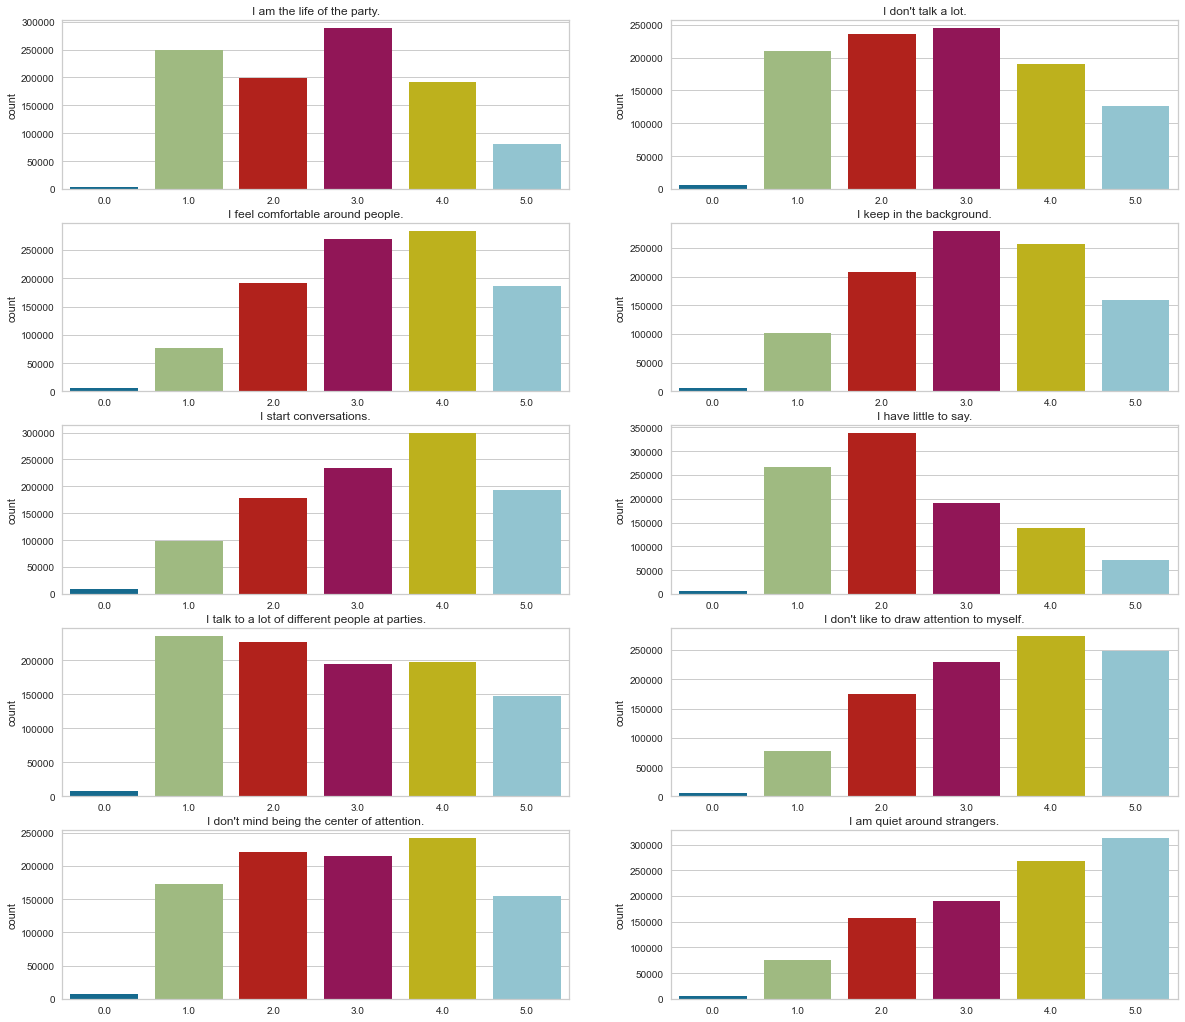

In [32]:


fig, axes = plt.subplots(5, 2,figsize=(20,18))

ax1 = sns.countplot(data[data.columns[0]], ax=axes[0,0])
ax1.set_xlabel('')
ax2 = sns.countplot(data[data.columns[1]],ax=axes[0,1])
ax2.set_xlabel('')
ax3 = sns.countplot(data[data.columns[2]], ax=axes[1,0])
ax3.set_xlabel('')
ax4 = sns.countplot(data[data.columns[3]],ax=axes[1,1])
ax4.set_xlabel('')
ax5 = sns.countplot(data[data.columns[4]], ax=axes[2,0])
ax5.set_xlabel('')
ax6 = sns.countplot(data[data.columns[5]],ax=axes[2,1])
ax6.set_xlabel('')
ax7 = sns.countplot(data[data.columns[6]], ax=axes[3,0])
ax7.set_xlabel('')
ax8 = sns.countplot(data[data.columns[7]],ax=axes[3,1])
ax8.set_xlabel('')
ax9 = sns.countplot(data[data.columns[8]], ax=axes[4,0])
ax9.set_xlabel('')
ax10 = sns.countplot(data[data.columns[9]],ax=axes[4,1])
ax10.set_xlabel('')

ax1.title.set_text(labels[0])
ax2.title.set_text(labels[1])
ax3.title.set_text(labels[2])
ax4.title.set_text(labels[3])
ax5.title.set_text(labels[4])
ax6.title.set_text(labels[5])
ax7.title.set_text(labels[6])
ax8.title.set_text(labels[7])
ax9.title.set_text(labels[8])
ax10.title.set_text(labels[9])

plt.show()



C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\li

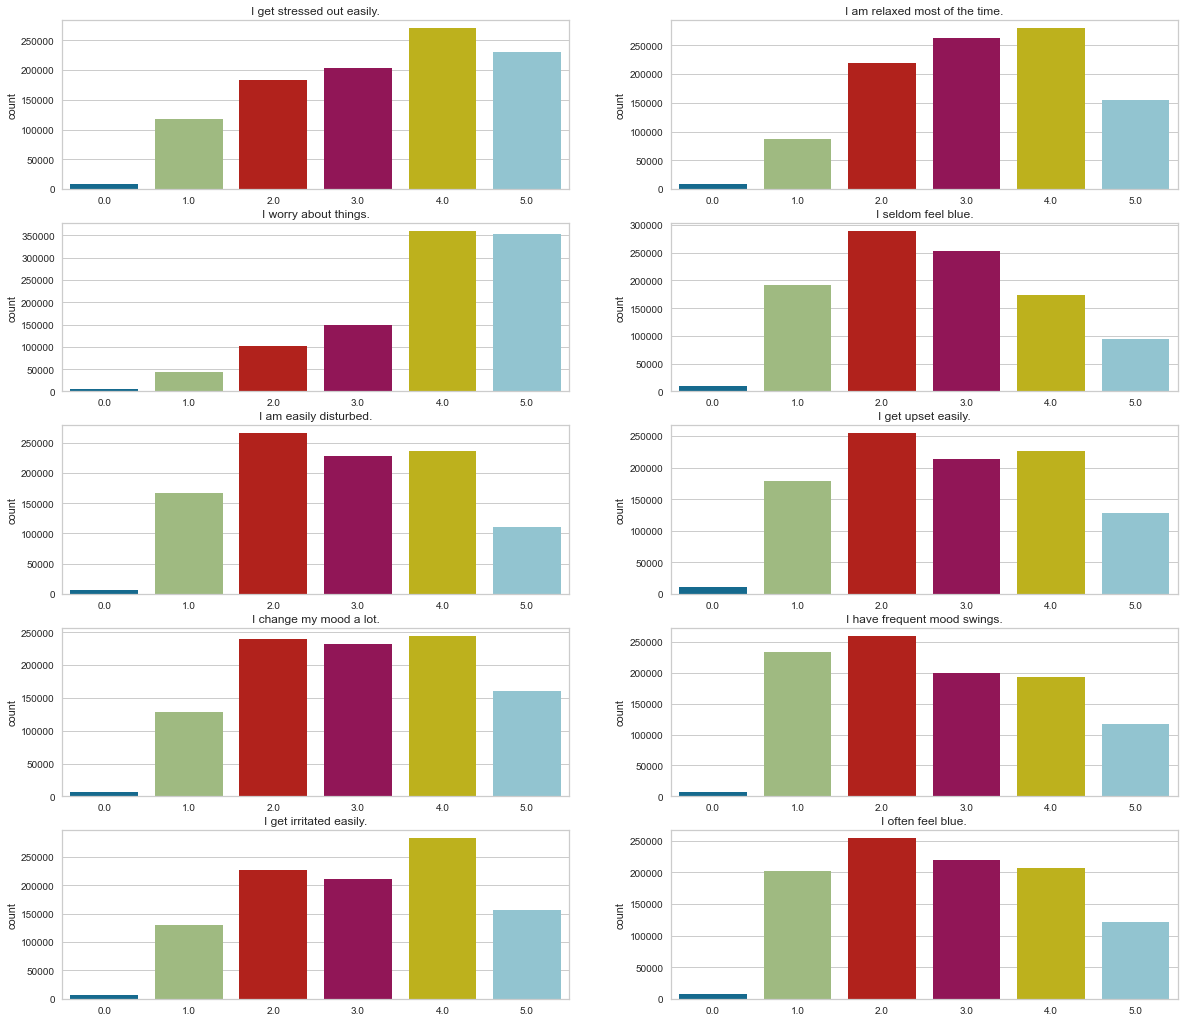

In [33]:
fig, axes = plt.subplots(5, 2,figsize=(20,18))

ax1 = sns.countplot(data[data.columns[10]], ax=axes[0,0])
ax1.set_xlabel('')
ax2 = sns.countplot(data[data.columns[11]],ax=axes[0,1])
ax2.set_xlabel('')
ax3 = sns.countplot(data[data.columns[12]], ax=axes[1,0])
ax3.set_xlabel('')
ax4 = sns.countplot(data[data.columns[13]],ax=axes[1,1])
ax4.set_xlabel('')
ax5 = sns.countplot(data[data.columns[14]], ax=axes[2,0])
ax5.set_xlabel('')
ax6 = sns.countplot(data[data.columns[15]],ax=axes[2,1])
ax6.set_xlabel('')
ax7 = sns.countplot(data[data.columns[16]], ax=axes[3,0])
ax7.set_xlabel('')
ax8 = sns.countplot(data[data.columns[17]],ax=axes[3,1])
ax8.set_xlabel('')
ax9 = sns.countplot(data[data.columns[18]], ax=axes[4,0])
ax9.set_xlabel('')
ax10 = sns.countplot(data[data.columns[19]],ax=axes[4,1])
ax10.set_xlabel('')

ax1.title.set_text(labels[10])
ax2.title.set_text(labels[11])
ax3.title.set_text(labels[12])
ax4.title.set_text(labels[13])
ax5.title.set_text(labels[14])
ax6.title.set_text(labels[15])
ax7.title.set_text(labels[16])
ax8.title.set_text(labels[17])
ax9.title.set_text(labels[18])
ax10.title.set_text(labels[19])

plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\li

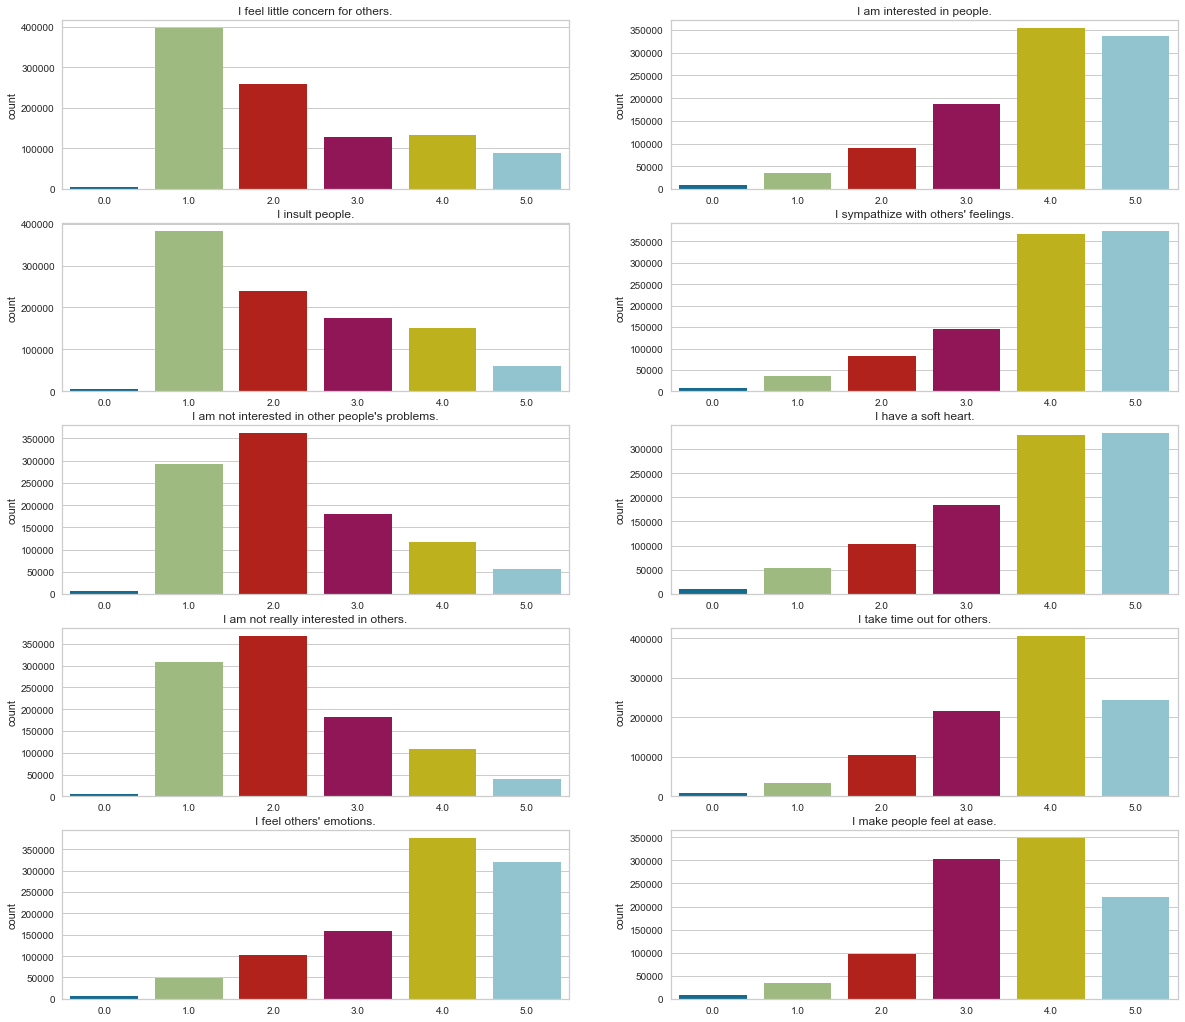

In [34]:
fig, axes = plt.subplots(5, 2,figsize=(20,18))

ax1 = sns.countplot(data[data.columns[20]], ax=axes[0,0])
ax1.set_xlabel('')
ax2 = sns.countplot(data[data.columns[21]],ax=axes[0,1])
ax2.set_xlabel('')
ax3 = sns.countplot(data[data.columns[22]], ax=axes[1,0])
ax3.set_xlabel('')
ax4 = sns.countplot(data[data.columns[23]],ax=axes[1,1])
ax4.set_xlabel('')
ax5 = sns.countplot(data[data.columns[24]], ax=axes[2,0])
ax5.set_xlabel('')
ax6 = sns.countplot(data[data.columns[25]],ax=axes[2,1])
ax6.set_xlabel('')
ax7 = sns.countplot(data[data.columns[26]], ax=axes[3,0])
ax7.set_xlabel('')
ax8 = sns.countplot(data[data.columns[27]],ax=axes[3,1])
ax8.set_xlabel('')
ax9 = sns.countplot(data[data.columns[28]], ax=axes[4,0])
ax9.set_xlabel('')
ax10 = sns.countplot(data[data.columns[29]],ax=axes[4,1])
ax10.set_xlabel('')

ax1.title.set_text(labels[20])
ax2.title.set_text(labels[21])
ax3.title.set_text(labels[22])
ax4.title.set_text(labels[23])
ax5.title.set_text(labels[24])
ax6.title.set_text(labels[25])
ax7.title.set_text(labels[26])
ax8.title.set_text(labels[27])
ax9.title.set_text(labels[28])
ax10.title.set_text(labels[29])

plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\li

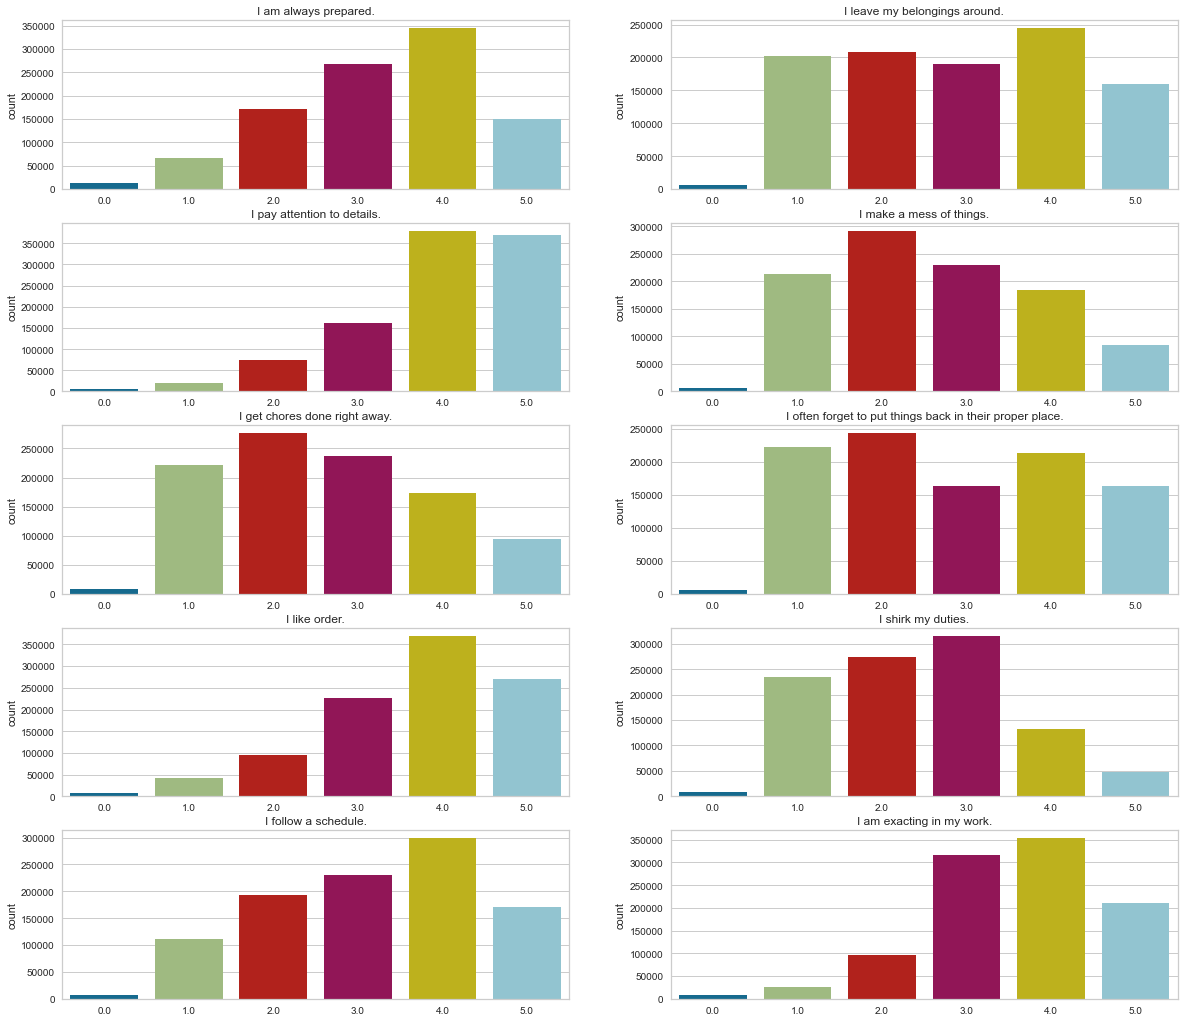

In [35]:
fig, axes = plt.subplots(5, 2,figsize=(20,18))

ax1 = sns.countplot(data[data.columns[30]], ax=axes[0,0])
ax1.set_xlabel('')
ax2 = sns.countplot(data[data.columns[31]],ax=axes[0,1])
ax2.set_xlabel('')
ax3 = sns.countplot(data[data.columns[32]], ax=axes[1,0])
ax3.set_xlabel('')
ax4 = sns.countplot(data[data.columns[33]],ax=axes[1,1])
ax4.set_xlabel('')
ax5 = sns.countplot(data[data.columns[34]], ax=axes[2,0])
ax5.set_xlabel('')
ax6 = sns.countplot(data[data.columns[35]],ax=axes[2,1])
ax6.set_xlabel('')
ax7 = sns.countplot(data[data.columns[36]], ax=axes[3,0])
ax7.set_xlabel('')
ax8 = sns.countplot(data[data.columns[37]],ax=axes[3,1])
ax8.set_xlabel('')
ax9 = sns.countplot(data[data.columns[38]], ax=axes[4,0])
ax9.set_xlabel('')
ax10 = sns.countplot(data[data.columns[39]],ax=axes[4,1])
ax10.set_xlabel('')

ax1.title.set_text(labels[30])
ax2.title.set_text(labels[31])
ax3.title.set_text(labels[32])
ax4.title.set_text(labels[33])
ax5.title.set_text(labels[34])
ax6.title.set_text(labels[35])
ax7.title.set_text(labels[36])
ax8.title.set_text(labels[37])
ax9.title.set_text(labels[38])
ax10.title.set_text(labels[39])

plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\li

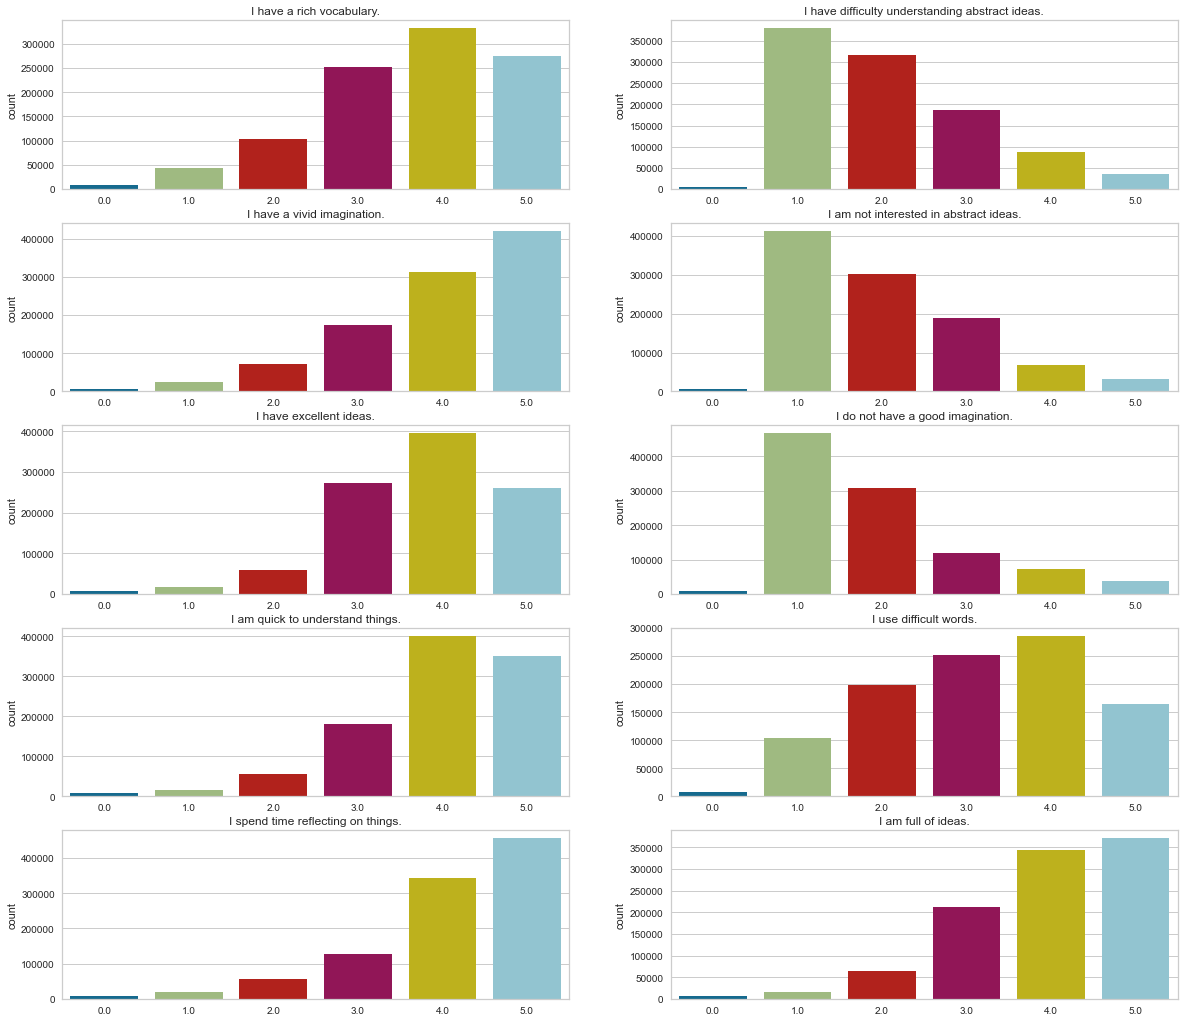

In [36]:
fig, axes = plt.subplots(5, 2,figsize=(20,18))

ax1 = sns.countplot(data[data.columns[40]], ax=axes[0,0])
ax1.set_xlabel('')
ax2 = sns.countplot(data[data.columns[41]],ax=axes[0,1])
ax2.set_xlabel('')
ax3 = sns.countplot(data[data.columns[42]], ax=axes[1,0])
ax3.set_xlabel('')
ax4 = sns.countplot(data[data.columns[43]],ax=axes[1,1])
ax4.set_xlabel('')
ax5 = sns.countplot(data[data.columns[44]], ax=axes[2,0])
ax5.set_xlabel('')
ax6 = sns.countplot(data[data.columns[45]],ax=axes[2,1])
ax6.set_xlabel('')
ax7 = sns.countplot(data[data.columns[46]], ax=axes[3,0])
ax7.set_xlabel('')
ax8 = sns.countplot(data[data.columns[47]],ax=axes[3,1])
ax8.set_xlabel('')
ax9 = sns.countplot(data[data.columns[48]], ax=axes[4,0])
ax9.set_xlabel('')
ax10 = sns.countplot(data[data.columns[49]],ax=axes[4,1])
ax10.set_xlabel('')

ax1.title.set_text(labels[40])
ax2.title.set_text(labels[41])
ax3.title.set_text(labels[42])
ax4.title.set_text(labels[43])
ax5.title.set_text(labels[44])
ax6.title.set_text(labels[45])
ax7.title.set_text(labels[46])
ax8.title.set_text(labels[47])
ax9.title.set_text(labels[48])
ax10.title.set_text(labels[49])

plt.show()

In [48]:
##Distribution of graph as compared to countries:

countries = data[data.country != 'NONE']
countries.country.value_counts()



US    545414
GB     66373
CA     61751
AU     49595
PH     19839
       ...  
GN         1
MF         1
TD         1
GQ         1
NE         1
Name: country, Length: 222, dtype: int64

In [67]:
# data.head()
data[pos_questions] = data[pos_questions].replace({1:-2, 2:-1, 3:0, 4:1, 5:2})
data[neg_questions] = data[neg_questions].replace({1:2, 2:1, 3:0, 4:-1, 5:-2})
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,0.0,-2.0,0.0,-1.0,0.0,0.0,-1.0,-2.0,-2.0,-2.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,-1.0,0.0,1.0,-1.0,0.0,1.0,-2.0,0.0,-1.0,-2.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,-1.0,1.0,-1.0,0.0,1.0,1.0,-1.0,-1.0,-2.0,-1.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,-2.0,0.0,-1.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [68]:
#Traits for mean data of each trait for each person:
traits = ['EXT', 'EST', 'AGR', 'CSN', 'OPN']
for trait in traits:
    new_col = str(trait)
    cols = [col for col in data.columns if (trait in col) and ('_E' not in col)]
    data[new_col] = data[cols].sum(axis=1)/10
data[traits].head()

,EXT,EST,AGR,CSN,OPN
0,1.6,-0.6,0.9,0.2,1.5
1,-1.0,-0.5,1.4,0.7,0.5
2,-0.5,-0.4,1.2,0.4,1.1
3,-0.4,-0.1,0.8,-0.5,0.9
4,-0.1,-1.1,1.6,1.8,1.8


In [69]:


pos_questions = [
    'EXT1','EXT3','EXT5','EXT7','EXT9',                      
    'EST1','EST3','EST5','EST6','EST7','EST8','EST9','EST10', 
    'AGR2','AGR4','AGR6','AGR8','AGR9','AGR10',              
    'CSN1','CSN3','CSN5','CSN7','CSN9','CSN10',               
    'OPN1','OPN3','OPN5','OPN7','OPN8','OPN9','OPN10',        
]
neg_questions = [ 
    'EXT2','EXT4','EXT6','EXT8','EXT10', 
    'EST2','EST4',                       
    'AGR1','AGR3','AGR5','AGR7',         
    'CSN2','CSN4','CSN6','CSN8',         
    'OPN2','OPN4','OPN6',                
]







In [70]:
data = data.drop(data.columns[:50], axis=1, inplace=False)
data.head()

,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,...,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,EXT,EST,AGR,CSN,OPN
0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,...,6,1,GB,51.5448,0.1991,1.6,-0.6,0.9,0.2,1.5
1,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,...,11,1,MY,3.1698,101.706,-1.0,-0.5,1.4,0.7,0.5
2,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,...,7,1,GB,54.9119,-1.3833,-0.5,-0.4,1.2,0.4,1.1
3,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,...,7,1,GB,51.75,-1.25,-0.4,-0.1,0.8,-0.5,0.9
4,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,...,17,2,KE,1.0,38.0,-0.1,-1.1,1.6,1.8,1.8


In [71]:
data = data[(data['IPC'] == 1)]

32


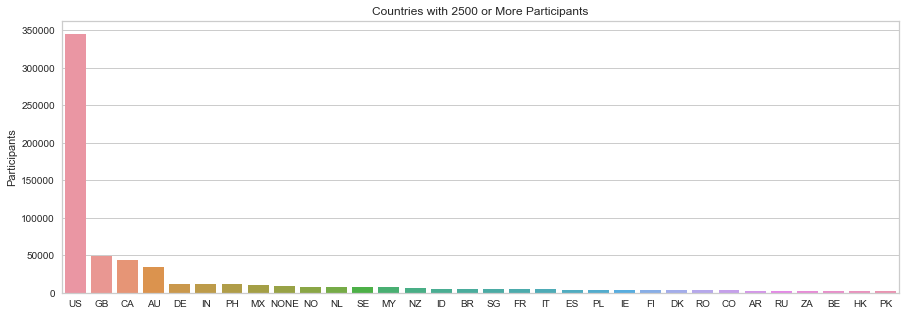

In [72]:
countries = pd.DataFrame(data['country'].value_counts())
countries_2500 = countries[countries['country'] >= 2500]
print(countries_2500.size)
plt.figure(figsize=(15,5))
sns.barplot(data=countries_2500, x=countries_2500.index, y='country')
plt.title('Countries with 2500 or More Participants')
plt.ylabel('Participants');

In [73]:
means_traits = pd.DataFrame(columns = traits)
for country in countries_2500.index: 
#     print(country)
    means = {}
    for trait in traits:
        means[trait] = (data[data['country'] == country])[trait].mean()
    means_traits.loc[country] = means
means_traits['country'] = countries_2500.index    
#     print(means)
print(means_traits)  


           EXT       EST       AGR       CSN       OPN country
US   -0.057633  0.043129  0.830007  0.401909  0.940361      US
GB   -0.075349  0.191341  0.688145  0.225743  0.939702      GB
CA   -0.082758  0.071682  0.770675  0.351014  0.944393      CA
AU   -0.046475  0.062068  0.788939  0.350350  0.886701      AU
DE   -0.154227  0.032984  0.608356  0.205319  1.102720      DE
IN   -0.044684  0.141981  0.706832  0.340375  0.774943      IN
PH   -0.216730  0.255220  0.618913  0.347754  0.649344      PH
MX   -0.083742  0.206620  0.553782  0.189315  0.862517      MX
NONE -0.123313  0.110069  0.711391  0.343857  0.907611    NONE
NO    0.065164 -0.006413  0.774742  0.353428  0.944534      NO
NL    0.067325 -0.064316  0.769740  0.290921  0.970154      NL
SE   -0.027508 -0.010812  0.626835  0.277070  1.030928      SE
MY   -0.182566  0.227746  0.610148  0.277554  0.477157      MY
NZ   -0.062865  0.051401  0.753544  0.304041  0.898316      NZ
ID   -0.212828  0.192096  0.569170  0.268403  0.707832 

In [74]:
print(countries_2500)

      country
US     345167
GB      49726
CA      43806
AU      34528
DE      12315
IN      12208
PH      11130
MX       9743
NONE     9604
NO       8342
NL       7743
SE       7427
MY       7302
NZ       6533
ID       5605
BR       5422
SG       5286
FR       5116
IT       4426
ES       4337
PL       4201
IE       4110
FI       3831
DK       3813
RO       3358
CO       3260
AR       2956
RU       2950
ZA       2830
BE       2795
HK       2722
PK       2606


<AxesSubplot:xlabel='country', ylabel='OPN'>

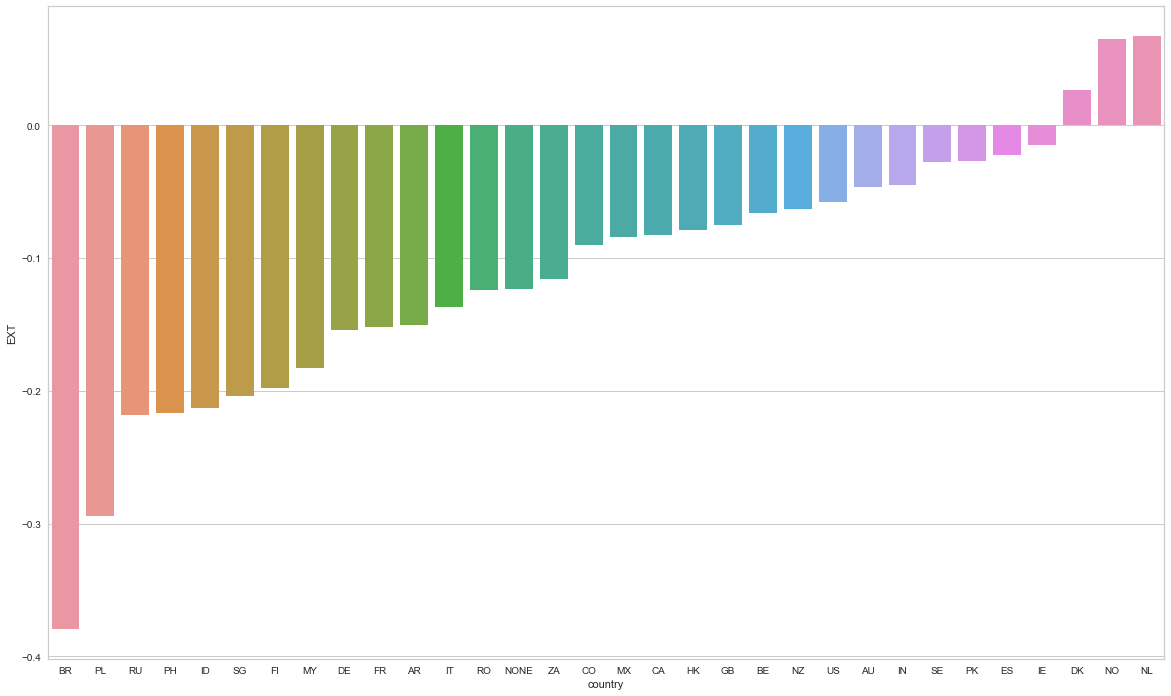

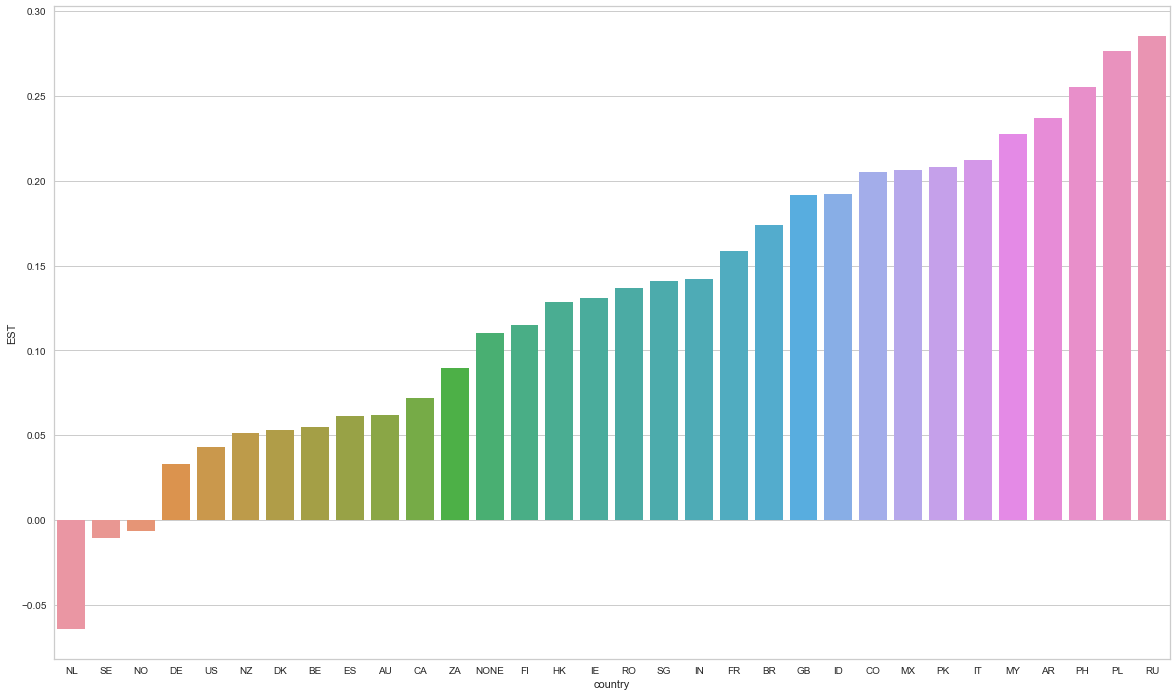

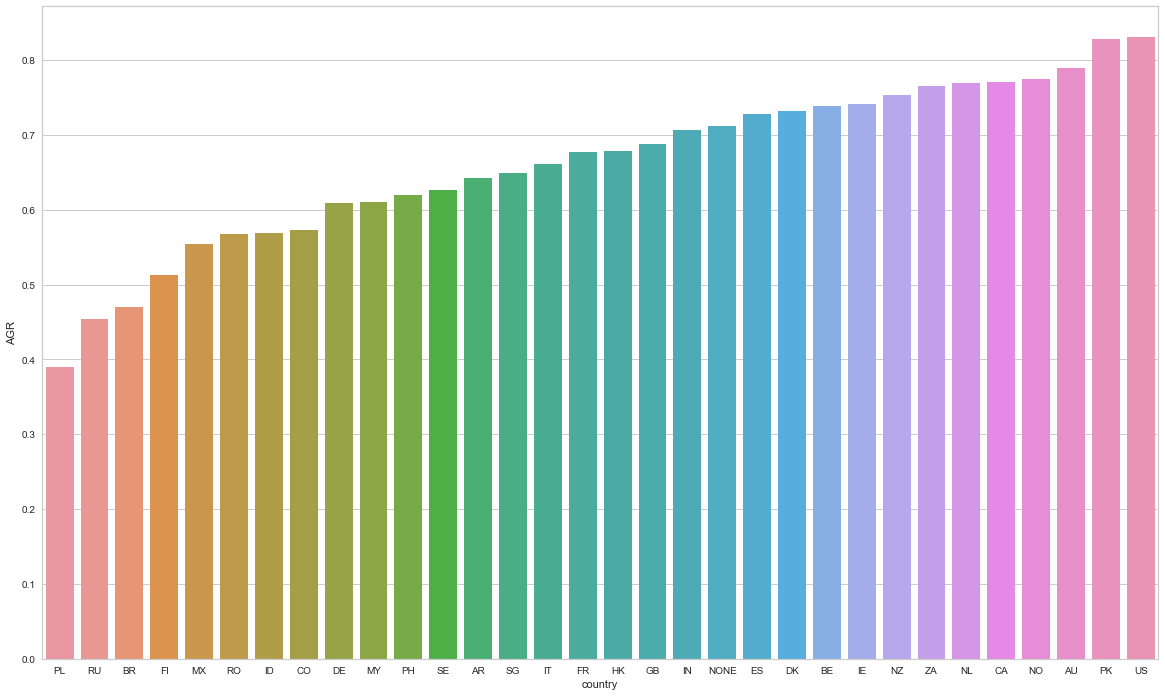

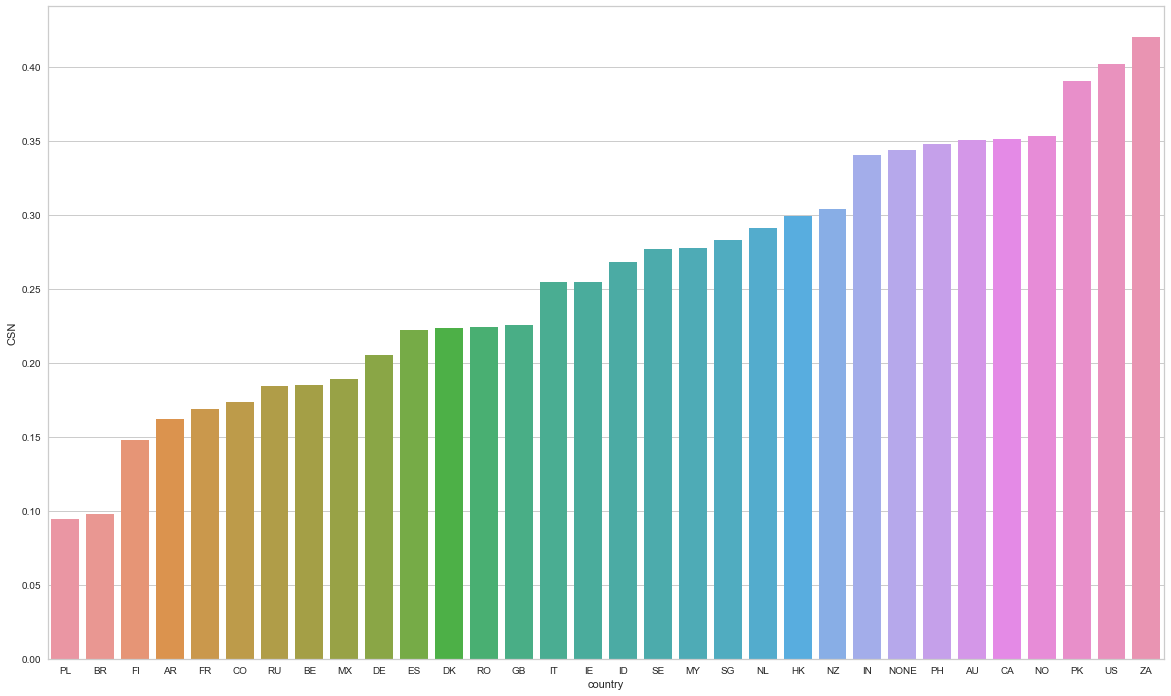

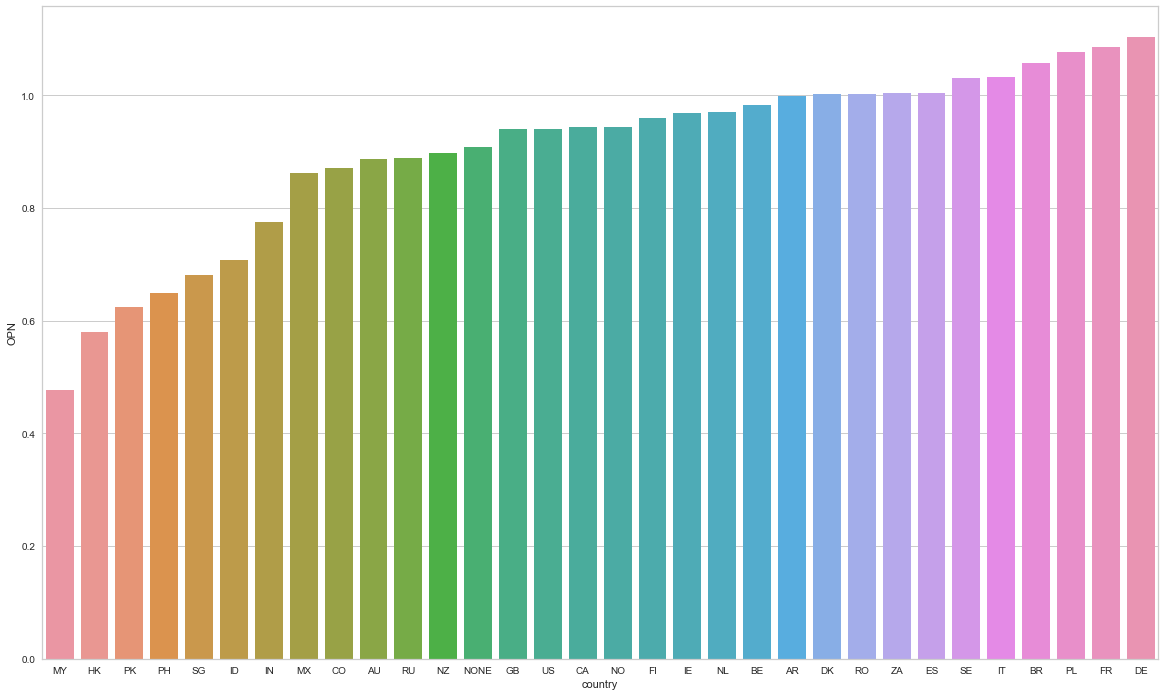

In [75]:
plt.figure(figsize=(20,12))
sns.barplot(x='country',
            y='EXT', 
            data=means_traits, 
            order=means_traits.sort_values('EXT').country)
plt.figure(figsize=(20,12))
sns.barplot(x='country',
            y='EST', 
            data=means_traits, 
            order=means_traits.sort_values('EST').country)
plt.figure(figsize=(20,12))
sns.barplot(x='country',
            y='AGR', 
            data=means_traits, 
            order=means_traits.sort_values('AGR').country)
plt.figure(figsize=(20,12))
sns.barplot(x='country',
            y='CSN', 
            data=means_traits, 
            order=means_traits.sort_values('CSN').country)
plt.figure(figsize=(20,12))
sns.barplot(x='country',
            y='OPN', 
            data=means_traits, 
            order=means_traits.sort_values('OPN').country)



In [110]:
##EDA clustering for HeatMap

In [94]:


Big_Five_corr = data.corr()



pd.set_option("display.max_rows", None, "display.max_columns", None)
Big_Five_corr



,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
EXT1,1.000000,-0.439143,0.464780,-0.486624,0.478108,-0.323412,0.581620,-0.368110,0.470591,-0.410360,-0.084901,0.138872,-0.089603,0.113550,-0.039042,-0.054966,0.000187,-0.017718,-0.048565,-0.172395,-0.012615,0.261119,0.071571,0.098776,-0.097103,0.061088,-0.204175,0.157760,0.137466,0.296741,0.037916,0.050283,0.013320,-0.016062,0.071801,0.018329,-0.031431,-0.002854,0.052459,0.046564,0.033391,0.002391,0.079624,0.020535,0.186444,-0.059884,0.074672,0.017119,-0.064358,0.167109
EXT2,-0.439143,1.000000,-0.412251,0.552499,-0.500491,0.541673,-0.444508,0.397680,-0.364016,0.490731,0.063285,0.000627,0.068575,-0.045368,0.047886,0.031888,0.024019,0.034091,0.043601,0.186061,0.123927,-0.250767,-0.033629,-0.089744,0.203620,-0.033550,0.298418,-0.129160,-0.109527,-0.201435,0.017524,-0.039520,0.051344,0.037364,-0.000860,-0.006394,0.047552,0.069263,-0.016073,0.006157,-0.026543,0.055751,-0.020448,0.041268,-0.094409,0.092985,-0.016314,-0.016648,0.080884,-0.106274
EXT3,0.464780,-0.412251,1.000000,-0.433411,0.554499,-0.321965,0.540904,-0.291680,0.422351,-0.433799,-0.199113,0.281680,-0.145945,0.206549,-0.133767,-0.172474,-0.149890,-0.181834,-0.195143,-0.316271,-0.095821,0.405814,-0.070121,0.218725,-0.197118,0.126714,-0.334038,0.268109,0.211085,0.373345,0.129305,-0.002372,0.082140,-0.144221,0.154186,-0.053773,0.044462,-0.110220,0.138767,0.100887,0.038615,-0.025367,0.033983,0.014507,0.175126,-0.034674,0.135581,-0.026945,-0.040645,0.138937
EXT4,-0.486624,0.552499,-0.433411,1.000000,-0.459694,0.457623,-0.465656,0.488620,-0.434476,0.538349,0.155048,-0.046423,0.187715,-0.080211,0.117342,0.125237,0.110193,0.118319,0.126803,0.266788,0.088399,-0.200117,0.012641,-0.010997,0.161452,0.030450,0.269913,-0.074395,-0.049684,-0.178376,-0.011116,0.022298,0.069346,0.140501,-0.042588,0.058707,0.070912,0.122826,-0.020649,0.009238,-0.004506,0.083328,0.051563,0.053093,-0.101131,0.082424,-0.023589,0.014464,0.139379,-0.079174
EXT5,0.478108,-0.500491,0.554499,-0.459694,1.000000,-0.409689,0.588749,-0.312217,0.421641,-0.486914,-0.095832,0.134055,-0.057803,0.128486,-0.050274,-0.068626,-0.043790,-0.065854,-0.085274,-0.196340,-0.088631,0.371268,-0.005905,0.199143,-0.190423,0.117999,-0.296715,0.251554,0.216631,0.358686,0.097499,0.028611,0.078161,-0.076184,0.134901,-0.015573,0.050836,-0.080858,0.124728,0.110863,0.090694,-0.036631,0.098574,-0.021648,0.220629,-0.076775,0.130957,0.058232,0.026833,0.208553
EXT6,-0.323412,0.541673,-0.321965,0.457623,-0.409689,1.000000,-0.337820,0.334421,-0.304943,0.403817,0.100405,-0.002801,0.090231,-0.022930,0.126665,0.102443,0.088611,0.096895,0.098738,0.184253,0.164838,-0.244083,0.003693,-0.083176,0.218865,0.017575,0.315177,-0.109722,-0.096692,-0.178795,-0.027191,-0.021518,-0.015096,0.106421,0.013701,0.047863,0.021859,0.127020,-0.005398,-0.050751,-0.156498,0.198031,-0.090231,0.176762,-0.201629,0.195725,-0.107694,-0.117037,-0.019148,-0.223725
EXT7,0.581620,-0.444508,0.540904,-0.465656,0.588749,-0.337820,1.000000,-0.321962,0.435965,-0.489291,-0.111186,0.149748,-0.094750,0.128431,-0.061740,-0.081199,-0.028453,-0.051385,-0.091975,-0.190125,-0.059293,0.334084,0.012328,0.149659,-0.144717,0.086804,-0.285858,0.214476,0.178130,0.324697,0.053236,0.036598,0.041287,-0.044355,0.112397,0.000469,0.005797,-0.037634,0.084809,0.073690,0.048882,-0.021453,0.070877,-0.000538,0.175992,-0.045449,0.102491,0.037711,-0.019222,0.175094
EXT8,-0.368110,0.397680,-0.291680,0.488620,-0.312217,0.334421,-0.321962,1.000000,-0.480239,0.417648,0.114467,-0.016485,0.144421,-0.038446,0.065089,0.063877,0.036033,0.032343,0.078770,0.148030,-0.000235,-0.132150,-0.051183,0.037079,0.096141,0.063459,0.183368,0.035022,0.001519,-0.078961,0.038805,-0.034712,0.092417,0.029179,0.018636,0.000361,0.122230,0.038783,0.043426,0.049275,-0.011537,0.063765,-0.0059

In [95]:
#Taking mean of a part of Each test and replacing columns with qualities for heatmap:
Big_Five_1['Social'] = (Big_Five_1.EXT1 + Big_Five_1.EXT3 + Big_Five_1.EXT5 + Big_Five_1.EXT7 + Big_Five_1.EXT9)/5
Big_Five_1.drop(['EXT1','EXT3','EXT5','EXT7','EXT9'],axis=1,inplace=True)


In [96]:
Big_Five_1['Not_Social'] = (Big_Five_1.EXT2 + Big_Five_1.EXT4 + Big_Five_1.EXT6 + Big_Five_1.EXT8 + Big_Five_1.EXT10)/5
Big_Five_1.drop(['EXT2','EXT4','EXT6','EXT8','EXT10'],axis=1,inplace=True)

In [97]:
Big_Five_1['Optimal_mood'] = (Big_Five_1.EST2 + Big_Five_1.EST4)/2
Big_Five_1.drop(['EST2','EST4'],axis=1,inplace=True)

In [98]:
Big_Five_1['Disturbed_mood'] = (Big_Five_1.EST1 + Big_Five_1.EST3 + Big_Five_1.EST5 + Big_Five_1.EST6 + Big_Five_1.EST7 + Big_Five_1.EST8 + Big_Five_1.EST9 + Big_Five_1.EST10)/8
Big_Five_1.drop(['EST1','EST3','EST5','EST6','EST7','EST8','EST9','EST10'],axis=1,inplace=True)

In [99]:
Big_Five_1['Positive_social_interactions'] = (Big_Five_1.AGR2 + Big_Five_1.AGR4 + Big_Five_1.AGR6 + Big_Five_1.AGR8 + Big_Five_1.AGR9 + Big_Five_1.AGR10)/6
Big_Five_1.drop(['AGR2','AGR4','AGR6','AGR8','AGR9','AGR10'],axis=1,inplace=True)

In [100]:
Big_Five_1['Negative_social_interactions'] = (Big_Five_1.AGR1 + Big_Five_1.AGR3 + Big_Five_1.AGR5 + Big_Five_1.AGR7)/4
Big_Five_1.drop(['AGR1','AGR3','AGR5','AGR7'],axis=1,inplace=True)

In [101]:
Big_Five_1['Organised'] = (Big_Five_1.CSN1 + Big_Five_1.CSN3 + Big_Five_1.CSN5 + Big_Five_1.CSN7 + Big_Five_1.CSN9 + Big_Five_1.CSN10)/6
Big_Five_1.drop(['CSN1','CSN3','CSN5','CSN7','CSN9','CSN10'],axis=1,inplace=True)

In [102]:
Big_Five_1['Unorganised'] = (Big_Five_1.CSN2 + Big_Five_1.CSN4 + Big_Five_1.CSN6 + Big_Five_1.CSN8)/4
Big_Five_1.drop(['CSN2','CSN4','CSN6','CSN8'],axis=1,inplace=True)

In [103]:
Big_Five_1['Thinker'] = (Big_Five_1.OPN1 + Big_Five_1.OPN3 + Big_Five_1.OPN5 + Big_Five_1.OPN7 + Big_Five_1.OPN8 + Big_Five_1.OPN9 + Big_Five_1.OPN10)/7
Big_Five_1.drop(['OPN1','OPN3','OPN5','OPN7','OPN8','OPN9','OPN10'],axis=1,inplace=True)

In [104]:
Big_Five_1['Non_thinker'] = (Big_Five_1.OPN2 + Big_Five_1.OPN4 + Big_Five_1.OPN6)/3
Big_Five_1.drop(['OPN2','OPN4','OPN6'],axis=1,inplace=True)

In [105]:
Big_Five_1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 11 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   country                       1015264 non-null  object 
 1   Social                        1013558 non-null  float64
 2   Not_Social                    1013558 non-null  float64
 3   Optimal_mood                  1013558 non-null  float64
 4   Disturbed_mood                1013558 non-null  float64
 5   Positive_social_interactions  1013558 non-null  float64
 6   Negative_social_interactions  1013558 non-null  float64
 7   Organised                     1013558 non-null  float64
 8   Unorganised                   1013558 non-null  float64
 9   Thinker                       1013558 non-null  float64
 10  Non_thinker                   1013558 non-null  float64
dtypes: float64(10), object(1)
memory usage: 85.2+ MB


In [106]:
def ag(x):
    lis = list(x.columns)
    lis.remove('Count')
    lis.remove('country')
    dic = dict()
    for i in lis:
        dic[i] = 'mean'
    dic['Count'] = 'sum'
    return dic
    
Big_Five_1['Count'] = 1
Big_Five_1_country = Big_Five_1.groupby(['country']).agg(ag(Big_Five_1))
Big_Five_1_country

,Social,Not_Social,Optimal_mood,Disturbed_mood,Positive_social_interactions,Negative_social_interactions,Organised,Unorganised,Thinker,Non_thinker,Count
country,,,,,,,,,,,
AD,3.000000,3.058824,3.176471,2.845588,3.813725,2.147059,3.401961,2.735294,3.798319,1.960784,17
AE,3.102549,3.040000,2.954902,3.145833,3.835240,2.344363,3.430283,2.663562,3.653268,2.123856,3061
AF,3.255556,3.051852,3.222222,2.837963,3.657407,2.430556,3.469136,2.643519,3.690476,2.444444,54
AG,2.666667,3.200000,2.812500,3.015625,3.541667,2.427083,3.340278,2.604167,3.922619,1.847222,24
AI,2.950000,3.400000,3.125000,3.062500,4.166667,1.625000,3.583333,2.312500,4.214286,1.666667,4
AL,2.885780,3.170642,3.004587,3.192087,3.680046,2.447248,3.387997,2.858372,3.901704,1.820336,436
AM,2.823853,3.047706,2.958716,3.287844,3.548930,2.431193,3.336391,2.805046,3.986894,1.663609,109
AO,2.585714,3.400000,3.357143,3.044643,3.392857,2.321429,3.142857,3.125000,3.897959,1.785714,14
AQ,3.100000,3.100000,2.750000,3.625000,3.916667,2.875000,3.166667,2.875000,3.857143,1.833333,2


In [107]:
Big_Five_1_country.sort_values('Count',ascending=False)

,Social,Not_Social,Optimal_mood,Disturbed_mood,Positive_social_interactions,Negative_social_interactions,Organised,Unorganised,Thinker,Non_thinker,Count
country,,,,,,,,,,,
US,3.015083,3.046096,2.907923,3.015272,3.811493,2.169351,3.454034,2.669111,3.828237,1.982006,546403
GB,2.977469,3.025596,2.834186,3.159856,3.688388,2.273106,3.267351,2.786364,3.848707,1.975444,66596
CA,2.992389,3.070557,2.888043,3.046089,3.779767,2.231789,3.409026,2.705805,3.843630,1.976555,61849
AU,3.030712,3.029771,2.940607,3.026898,3.782941,2.219072,3.367626,2.668276,3.782701,2.047830,50030
PH,2.901935,3.223080,2.975333,3.217043,3.738317,2.563067,3.496741,2.745376,3.512080,2.271299,19847
IN,3.083286,3.039835,2.981981,3.068728,3.801691,2.430343,3.361829,2.593482,3.593419,2.047458,17491
DE,2.820591,3.072195,2.939009,2.994000,3.585617,2.337493,3.276638,2.862681,4.013734,1.733385,14095
NONE,2.920778,3.115385,2.928759,3.088150,3.719906,2.339443,3.371972,2.707274,3.777536,1.992299,13728
NZ,3.092701,3.006883,2.985217,3.029595,3.735140,2.280644,3.310184,2.720088,3.706135,2.093266,12992


In [108]:
Big_Five_1_country = Big_Five_1_country[Big_Five_1_country.Count>1000]
Big_Five_1_country = Big_Five_1_country.sort_values('Count',ascending=False)

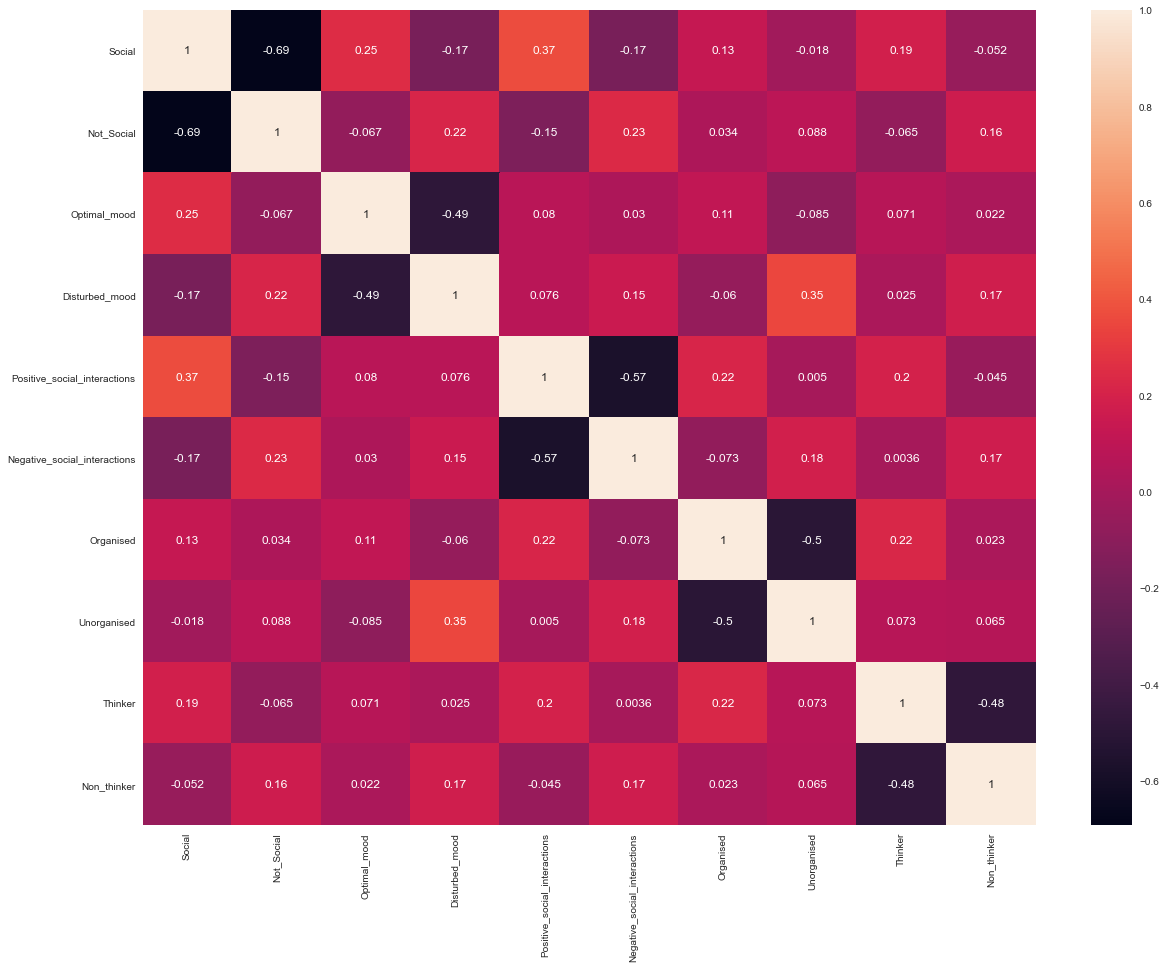

In [109]:
plt.figure(figsize=(20,15,))
sns.heatmap(Big_Five_1[['Social','Not_Social','Optimal_mood','Disturbed_mood','Positive_social_interactions','Negative_social_interactions','Organised','Unorganised','Thinker','Non_thinker']].corr(),annot=True)
plt.show()

In [4]:
data = pd.read_csv('C:/Users/Lenovo/Downloads/archive/IPIP-FFM-data-8Nov2018/data-final.csv', delimiter='\t')

In [5]:


answer_data = data.iloc[:,0:50]

answer_data['country'] = data['country']



In [6]:
for col in answer_data.columns:
    answer_data[col] = answer_data[col].astype('category').cat.codes

In [7]:
corr_data = pd.DataFrame(answer_data.corr()['country'][:])

In [8]:
corr_data = corr_data.reset_index()

In [9]:
#Correlation data:: Data created for comparing the positive factors of X and Y in a graph:
top_correlation = corr_data.sort_values('country', ascending=False).head(10)['index'].to_list()

In [10]:
least_correlation = corr_data.sort_values('country', ascending=False).tail(5)['index'].to_list()

In [11]:
correlation_data = answer_data[top_correlation+least_correlation]

In [12]:
target_data = answer_data['country']
data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split

In [ ]:
# We split the data in 70 and 30% as testing and training data:

var_train, var_test, res_train, res_test = train_test_split(correlation_data, target_data, test_size = 0.3)

logistic_reg = LogisticRegression(random_state=0).fit(var_train, res_train)

In [127]:
#predicting logistic regression on test data:
prediction = logistic_reg.predict(var_test)

NameError: name 'logistic_reg' is not defined

In [128]:
#Finding accuracy on the basis on decision tree:

accuracy_score(res_test, prediction)



decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(var_train, res_train) 

decision_prediction = decision_tree.predict(var_test)


In [130]:


accuracy_score(res_test, decision_prediction)*100



99.99473762107583